

# Group F: Kaumudi, Jorge, Zhizheng, Gregoire, Yusuf


# Python for Data Analysis 1: Group Assignment 

## Goal

To obtain a clean version of the dataset without missing values, with the whole dataset numerical and normalised

### Outline

1. Loading dataset

2. Missing value management \
    2.1. Identification \
    2.2. Removal of non-valuable columns/rows \
    2.3. Filling missing values 

3. Outlier management \
    3.1. Detection \
    3.2. Removal 

4. Encoding \
    4.1. Encoding numerical as categorical \
    4.2. Encoding categorical 
        4.2.1. Label Encoding - encode as numerical (ordinal categories) 
        4.2.2. Dummy Encoding - encode as dummies (pure categorical variables) 

5. Normalization 

6. Optional: Building & Testing ML Model \
    6.1. Correlation Matrix Heatmap \
    6.2. Correlation Variable Filtering \
    6.3. ML Model Creation & Evaluation 
    

### 1. Loading the Dataset

In [1]:
### 1. Loading the dataset ###

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file as dataframe 
housing_df = pd.read_csv("dataset_housing.csv")
# document the original shape of our dataframe
original_shape = [1460, 81]
# show the dataframe's first few rows
housing_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_housing.csv'

### 2. Missing value management

In [2]:
### 2. Missing value management ###

## 2.1. Identification ##

# show the % of missing value rows for each column
null_counts = round(100*housing_df.isnull().mean(),2)

# filter out the rows without any missing values and sort in descending order, convert to dataframe
null_counts = pd.DataFrame(data = null_counts[null_counts>0].sort_values(ascending = False), columns = ['%'])

# Create column to show the sum of the rows having missing values for each column
null_counts['# Rows'] = housing_df.isnull().sum()
# Create column to show the datatype of each column
null_counts['DataType'] = housing_df.dtypes

null_counts

,%,# Rows,DataType
PoolQC,99.52,1453,object
MiscFeature,96.30,1406,object
Alley,93.77,1369,object
Fence,80.75,1179,object
FireplaceQu,47.26,690,object
LotFrontage,17.74,259,float64
GarageType,5.55,81,object
GarageYrBlt,5.55,81,float64
GarageFinish,5.55,81,object
GarageQual,5.55,81,object


In [3]:
## 2.2. Removal of non-valuable columns/rows ##

# remove columns that have >80% missing values
housing_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], inplace = True)

# Remove the rows of missing values if number is low (< 5 rows)
housing_df = housing_df.dropna(subset=['Electrical'])

In [4]:
## 2.3. Filling missing values ##

# Numerical columns: Fill with 0
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(0)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(0)
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)

# Categorical colums: Create a new category based on column description
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].fillna('No Fireplace')
housing_df['GarageType'] = housing_df['GarageType'].fillna('No Garage')
housing_df['GarageFinish'] = housing_df['GarageFinish'].fillna('No Garage')
housing_df['GarageQual'] = housing_df['GarageQual'].fillna('No Garage')
housing_df['GarageCond'] = housing_df['GarageCond'].fillna('No Garage')
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].fillna('No Basement')
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].fillna('No Basement')
housing_df['BsmtCond'] = housing_df['BsmtCond'].fillna('No Basement')
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].fillna('No Basement')
housing_df['BsmtQual'] = housing_df['BsmtQual'].fillna('No Basement')
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('None')

### 3. Outlier Management

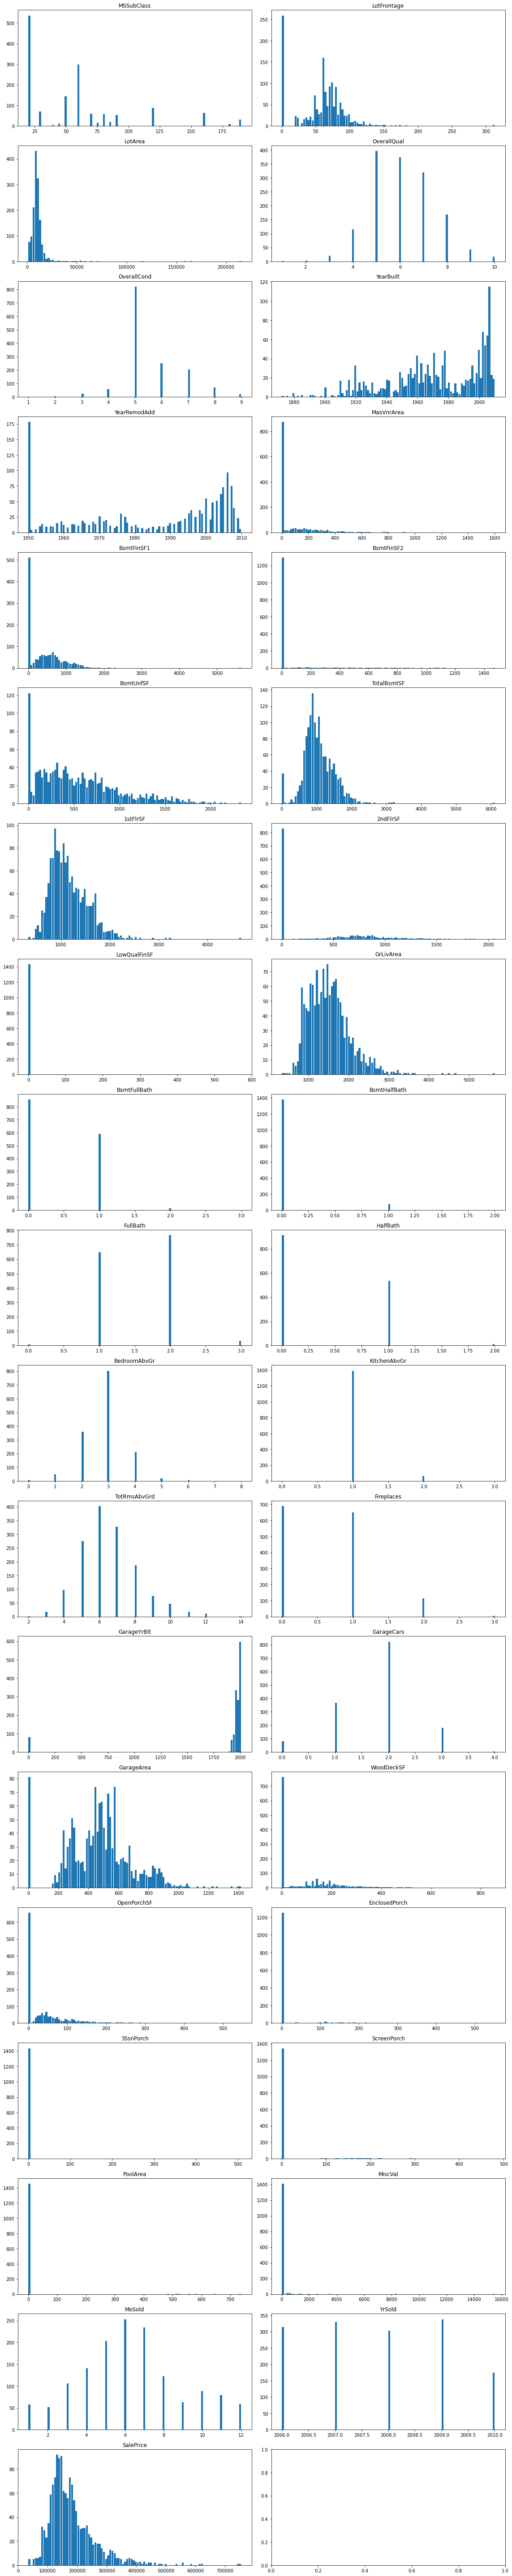

In [5]:
### 3. Outlier Management ###

## 3.1. Detection ##

# Plot the distribution of numerical columns from the dataset
numeric_housing_df = housing_df.select_dtypes("number")
    
fig,axes = plt.subplots(nrows=19, ncols=2, figsize =(16,80))
 
for idx, column in enumerate(numeric_housing_df.columns[1:]):
    numeric_housing_df[column].plot(kind="hist", bins=100, rwidth=.9, title=column, ax=axes[idx//2, idx%2])
    ax=axes[idx//2, idx%2].yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

In [6]:
## 3.2. Removal ##

# Based on observation of our distribution we select the columns for outlier removal
outlier_columns = ['GrLivArea','1stFlrSF','TotalBsmtSF','LotArea']
upper_cutoff = []

# Loop through each column, for every column calculate percentiles and IQR  
for i in outlier_columns:  
    q25 = np.percentile(housing_df[i], 25)
    q75 = np.percentile(housing_df[i], 75)
    iqr = q75 - q25

    # calculate the upper cut-off limit for each column and append it to a list, we define it as q75 + 3 times the iqr
    cut_off = iqr * 3
    upper_cutoff.append(q75 + cut_off)

# remove the outliers from the dataframe for each of the 4 columns, by taking only the values below the upper_cuttoff limit
housing_df = housing_df[housing_df['GrLivArea'] < upper_cutoff[0]]
housing_df = housing_df[housing_df['1stFlrSF'] < upper_cutoff[1]]
housing_df = housing_df[housing_df['TotalBsmtSF'] < upper_cutoff[2]]
housing_df = housing_df[housing_df['LotArea'] < upper_cutoff[3]]

### 4. Encoding

In [7]:
### 4. Encoding ###

## 4.1. Encoding Numerical as Caterogical Columns ##

# Replace to string values (categories)
housing_df['MSSubClass'] = housing_df['MSSubClass'].replace({20: '1-STORY_NEW', 30: '1-STORY_OLD',
                                                         40: '1-STORY_ALLAGES' , 45: '1-1/2STORY_ALL_UNFINISHED', 
                                                         50:  '1-1/2STORY_ALL_FINISHED', 60: '2-STORY_NEW',
                                                         70: '2-STORY_OLD', 75: '2-1/2STORY_ALL',
                                                         80: 'SPLIT/MULTI-LVL', 85: 'SPLIT_FOYER',
                                                         90: 'DUPLEX', 120: '1-STORY_PUD_NEW', 
                                                         150: '1-1/2STORY_PUD_ALL',160: '2-STORY_PUD_NEW',
                                                         180: 'PUD_MULTILVL', 190: '2FAMILY_CONVERSION' })

In [8]:
## 4.2. Encoding Categorical Columns ##

# 4.2.1. Label encoding (apply only to ordered variables, i.e. quality related, or boolean variables) #

# Replace categorical variables by numbers based on quality ranking/ for boolean Y to 1 and N to 0
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].replace({'Ex': 5 , 'Gd': 4 ,'TA': 3,'Fa': 2,'Po': 1, 'No Fireplace': 0 })
housing_df['GarageQual'] = housing_df['GarageQual'].replace({'Ex': 5 , 'Gd': 4 ,'TA': 3, 'Fa': 2,'Po': 1, 'No Garage': 0})
housing_df['GarageCond'] = housing_df['GarageCond'].replace({'Ex': 5 , 'Gd': 4 ,'TA': 3, 'Fa': 2,'Po': 1, 'No Garage': 0})
housing_df['ExterQual'] = housing_df['ExterQual'].replace({'Ex': 4, 'Gd': 3,'TA': 2, 'Fa': 1 })
housing_df['ExterCond'] = housing_df['ExterCond'].replace({'Ex': 5 , 'Gd': 4 ,'TA': 3, 'Fa': 2,'Po': 1 })
housing_df['BsmtQual'] = housing_df['BsmtQual'].replace({'Ex': 5 , 'Gd': 4 ,'TA': 3, 'Fa': 2,'Po': 1, 'No Basement': 0})
housing_df['BsmtCond'] = housing_df['BsmtCond'].replace({'Ex': 5 , 'Gd': 4 ,'TA': 3, 'Fa': 2,'Po': 1, 'No Basement': 0})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].replace({'Gd': 4, 'Av': 3,'Mn': 2, 'No': 1, 'No Basement': 0})
housing_df['HeatingQC'] = housing_df['HeatingQC'].replace({'Ex': 5 , 'Gd': 4 ,'TA': 3, 'Fa': 2,'Po': 1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].replace({'Ex': 5 , 'Gd': 4 ,'TA': 3, 'Fa': 2,'Po': 1})
housing_df['CentralAir'] = housing_df['CentralAir'].replace({'Y': 1 , 'N': 0 })

# 4.2.2. Dummy encoding #
# create list of all categorical columns to dummy encode
dummy_columns = ['MSZoning','GarageType','GarageFinish','BsmtFinType1','BsmtFinType2','MSSubClass',
                 'MasVnrType','Electrical','Functional','PavedDrive','SaleType','SaleCondition','Street', 'LotShape', 
                 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1','Condition2',
                 'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation', 'Heating']

# Create a dummy dataframe: change categorical to dummy variables having 0/1 as values 
dummy_df = pd.get_dummies(housing_df[dummy_columns])

# Drop the previous categorical columns from housing_df 
housing_df_updated = housing_df.drop(columns = dummy_columns)

# Merge the new dummy dataframe to housing_df
housing_df_updated = pd.merge(
    left=housing_df_updated,
    right=dummy_df,
    left_index=True,
    right_index=True,
)

### 5. Normalization

In [9]:
### 5. Normalization ###

# standardization - subtract the mean and scaling to have mean = 0 and standard deviation = 1
housing_df_updated = (housing_df_updated - housing_df_updated.mean()) / housing_df_updated.std()

# Check that the mean is now 0 (or almost 0):
print('Standardized attributes max mean: ' + str(housing_df_updated.mean().max()))
print('Standardized attributes average mean: ' + str(housing_df_updated.mean().mean()))
print('Standardized attributes min mean: ' + str(housing_df_updated.mean().min()))

# Check that the stds is now 1:
print('Standardized attributes max std: ' + str(housing_df_updated.std().max()))
print('Standardized attributes average std: ' + str(housing_df_updated.std().mean()))
print('Standardized attributes min std: ' + str(housing_df_updated.std().min()))


Standardized attributes max mean: 2.7076150398446336e-15
Standardized attributes average mean: -3.1259473660541596e-16
Standardized attributes min mean: -7.463079450206392e-14
Standardized attributes max std: 1.0000000000000366
Standardized attributes average std: 1.0
Standardized attributes min std: 0.9999999999999692


### 6. Optional: Building & Evaluating ML Model

### 6.1. Correlation Matrix Heat Map

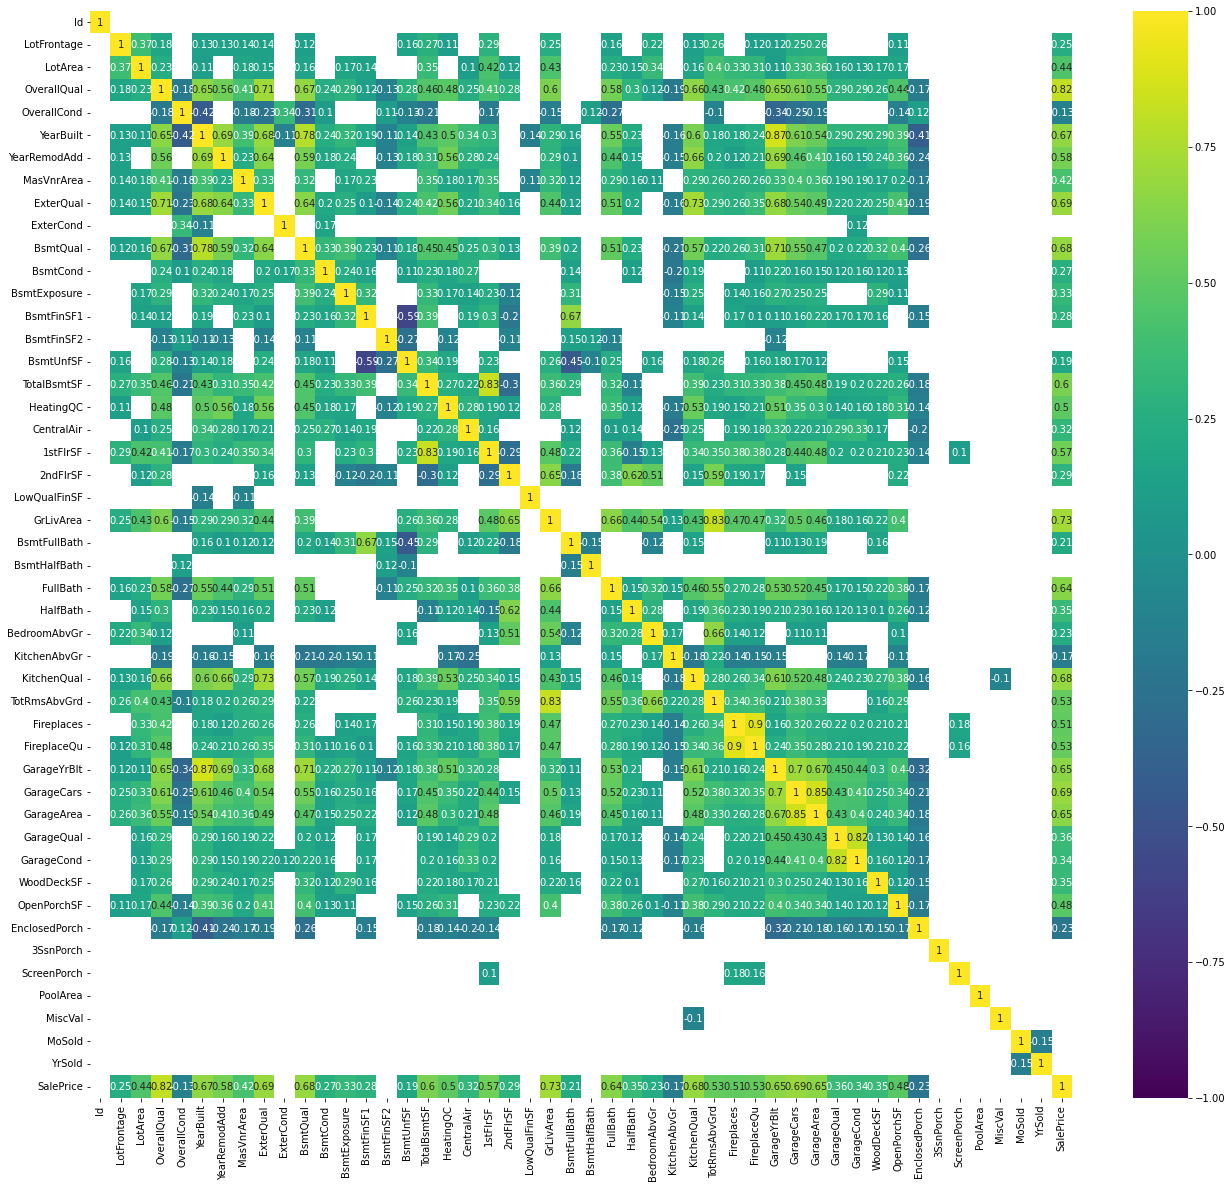

In [10]:
### 6. Optional: Building & Evaluating ML Model ###

## 6.1. Correlation Matrix Heat Map ##
import seaborn as sns

# Create a correlation matrix with original dataframe (for the sake of viewing)
corr_matrix = housing_df.corr(method = 'spearman')
# Plot the matrix using seaborn
%matplotlib inline
fig, ax = plt.subplots(figsize=(22, 20))
sns.heatmap(corr_matrix[abs(corr_matrix)>0.1], annot=True, vmin=-1, vmax=+1, cmap='viridis')
plt.show()

### 6.2. Correlation Variable Filtering

In [11]:
## 6.2. Correlation Variable Filtering ##

# We create a correlation matrix, now using the updated dataframe
corr_matrix = abs(housing_df_updated.corr(method = 'spearman'))

aux =[]  

# We iterate through each row in the column SalePrice of the matrix          
for i in range(len(corr_matrix['SalePrice'])):
    # Selecting a threshold of 0.1, we append all variables with a corelation below this score to a list
    if(corr_matrix['SalePrice'][i]< 0.1): 
        aux.append(corr_matrix['SalePrice'].index[i])   
    else:
        continue

# we remove the variables of this list from our dataframe, define this as a new dataframe
housing_df_updated_new = housing_df_updated.drop(aux, axis = 1)

# Step to double check that we have no missing values and no non-numeric values
housing_df_updated_new = housing_df_updated_new.loc[:,housing_df_updated_new.dtypes != object]
housing_df_updated_new.dropna(inplace=True)

### 6.3. ML Model Creation & Evaluation

In [15]:
## 6.3. ML Model Creation & Evaluation ##

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Create 85/15 train test split of the new dataframe
df_train, df_test = train_test_split(housing_df_updated_new, test_size=0.15, random_state=123)

# Run the model trying different hyperparameters, print the score to identify the ideal hyperparameters

# Model 1
model = RandomForestRegressor(n_estimators = 200,random_state=123)
#fit the model by selecting Feature variables for X and SalePrice for y
model.fit(
    X=df_train.drop("SalePrice", axis=1), # input to the model (all columns except SalePrice)
    y=df_train["SalePrice"] # desired outcome of the model
)
               
# And we print the final score obtained by the model
print("The final score of model 1 is: ",round(float(model.score(X=df_test.drop("SalePrice", axis=1),y =df_test["SalePrice"]),)*100,2),"%",
     "n-estimators: ",200, "random_state: ",123)

# Model 2
model = RandomForestRegressor(n_estimators = 100,random_state=123)
#fit the model by selecting Feature variables for X and SalePrice for y
model.fit(
    X=df_train.drop("SalePrice", axis=1), # input to the model (all columns except SalePrice)
    y=df_train["SalePrice"] # desired outcome of the model
)
               
# And we print the final score obtained by the model
print("The final score of model 2 is: ",round(float(model.score(X=df_test.drop("SalePrice", axis=1),y =df_test["SalePrice"]),)*100,2),"%",
     "n-estimators: ", 100, "random_state: ",123)

# Model 3
model = RandomForestRegressor(n_estimators = 50,random_state=123)
#fit the model by selecting Feature variables for X and SalePrice for y
model.fit(
    X=df_train.drop("SalePrice", axis=1), # input to the model (all columns except SalePrice)
    y=df_train["SalePrice"] # desired outcome of the model
)
               
# And we print the final score obtained by the model
print("The final score of model 3 is: ",round(float(model.score(X=df_test.drop("SalePrice", axis=1),y =df_test["SalePrice"]),)*100,2),"%",
     "n-estimators: ", 50, "random_state: ",123)


The final score of model 1 is:  91.45 % n-estimators:  200 random_state:  123
The final score of model 2 is:  91.59 % n-estimators:  100 random_state:  123
The final score of model 3 is:  91.2 % n-estimators:  50 random_state:  123


In [19]:
# Model 4: Test the best model using a different train test split

# Create 70/30 train test split of the new dataframe
df_train, df_test = train_test_split(housing_df_updated_new, test_size=0.3, random_state=123)

# Choose a model and the ideal hyperparameters, fit the model by selecting X (Feature variables) and Y (SalePrice)
model = RandomForestRegressor(n_estimators = 100,random_state=123)
model.fit(
    X=df_train.drop("SalePrice", axis=1), # input to the model (all columns except SalePrice)
    y=df_train["SalePrice"] # desired outcome of the model
)
               
# And we print the final score obtained by the model
print("The final score of model 4 is: ",round(float(model.score(X=df_test.drop("SalePrice", axis=1),y =df_test["SalePrice"]),)*100,2),"%",
     "Train test split used: ","70/30")


The final score of model 4 is:  90.66 % Train test split used:  70/30


### Evaluating changes in shape

In [20]:
# We finally check how the shape has chenged since the beginning

print(original_shape, housing_df_updated_new.shape)

[1460, 81] (1420, 126)


### Save to a .csv

In [21]:
# Save to a new .csv

housing_df_updated_new.to_csv("clean_dataset_housing.csv")